# Understanding Time Series Forecasting 

In [15]:
# Import the necessary libraries 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [16]:
# Import the data 
data = pd.read_csv("./Data/BTC-USD.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


Here’s a breakdown of the columns in your dataset:  

1. **Date** – Represents the trading date in YYYY-MM-DD format.  
2. **Open** – The price of the asset at the start of the trading session.  
3. **High** – The highest price reached during the trading session.  
4. **Low** – The lowest price recorded during the trading session.  
5. **Close** – The final price at which the asset was traded by the end of the session.  
6. **Adj Close** – The closing price adjusted for splits, dividends, and corporate actions.  
7. **Volume** – The total number of shares or contracts traded during the session.  

In [17]:
# info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3228 entries, 0 to 3227
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3228 non-null   object 
 1   Open       3228 non-null   float64
 2   High       3228 non-null   float64
 3   Low        3228 non-null   float64
 4   Close      3228 non-null   float64
 5   Adj Close  3228 non-null   float64
 6   Volume     3228 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 176.7+ KB


In [18]:
# convert date to a datetime object 
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')
 
# set Date as index 
data.set_index('Date', inplace=True)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3228 entries, 2014-09-17 to 2023-07-20
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3228 non-null   float64
 1   High       3228 non-null   float64
 2   Low        3228 non-null   float64
 3   Close      3228 non-null   float64
 4   Adj Close  3228 non-null   float64
 5   Volume     3228 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 176.5 KB


In [20]:
# resampling data to a different granularity
weekly_data = data.resample("W").agg({
    "Open": "first",  # First open price of the week
    "High": "max",    # Highest high of the week
    "Low": "min",     # Lowest low of the week
    "Close": "last",  # Last close price of the week
    "Adj Close": "last",
    "Volume": "sum"   # Total volume traded in the week
})

weekly_data


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-21,465.864014,468.174011,384.532013,398.821014,398.821014,156903400
2014-09-28,399.100006,441.557007,374.332001,377.181000,377.181000,186772600
2014-10-05,376.928009,391.378998,289.295990,320.510010,320.510010,276657896
2014-10-12,320.389008,382.726013,302.559998,378.549011,378.549011,341152804
2014-10-19,377.920990,411.697998,368.897003,389.545990,389.545990,156902070
...,...,...,...,...,...,...
2023-06-25,26335.441406,31389.539063,26312.832031,30480.261719,30480.261719,138005623534
2023-07-02,30480.523438,31256.863281,29600.275391,30620.769531,30620.769531,106681707513
2023-07-09,30624.515625,31460.052734,29777.285156,30171.234375,30171.234375,90491031635


### **Common Resampling Frequencies:**
| Granularity  | Code  |
|--------------|------|
| Daily        | `"D"`  |
| Weekly       | `"W"`  |
| Month End      | `"ME"`  |
| Quarterly    | `"Q"`  |
| Yearly       | `"Y"`  |

## EDA

### Rolling Average

#### **What is a Rolling Average?**  
A **rolling average** (also called a **moving average**) is a technique used in time series analysis to smooth out short-term fluctuations and highlight long-term trends. It calculates the average of a fixed window of previous values over time.

#### **How It Works**  
- You define a **window size** (e.g., 7 days for a weekly rolling average).  
- The average is computed over this window and shifts forward one step at a time.  
- As new data comes in, the oldest data in the window is dropped.

#### **Example Calculation (Window = 3)**
| Date       | Value | Rolling Average (3-day) |
|------------|--------|--------------------|
| 2024-03-01 | 100    | -                  |
| 2024-03-02 | 110    | -                  |
| 2024-03-03 | 120    | **(100+110+120)/3 = 110** |
| 2024-03-04 | 130    | **(110+120+130)/3 = 120** |
| 2024-03-05 | 140    | **(120+130+140)/3 = 130** |

---

#### **Types of Moving Averages**
1. **Simple Moving Average (SMA)** – Plain average of values in the window.
2. **Exponential Moving Average (EMA)** – Weights recent data more heavily.
3. **Weighted Moving Average (WMA)** – Assigns different weights to data points.

---

#### **Why Use Rolling Averages?**
✔ Removes noise from time series data  
✔ Helps identify trends in stock prices, weather, and economic data  
✔ Useful for smoothing fluctuations in financial markets 

In [21]:
# Calculate 3-day Rolling Average
data['3_day SMA'] = data['Close'].rolling(window=3).mean()
data.head(10)

,Open,High,Low,Close,Adj Close,Volume,3_day SMA
Date,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,NaN
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,NaN
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,425.523336
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,409.379995
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,400.840332
2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,24127600,403.292338
2014-09-23,402.092010,441.557007,396.196991,435.790985,435.790985,45099500,412.254669
2014-09-24,435.751007,436.112000,421.131989,423.204987,423.204987,30627700,420.382660
2014-09-25,423.156006,423.519989,409.467987,411.574005,411.574005,26814400,423.523326


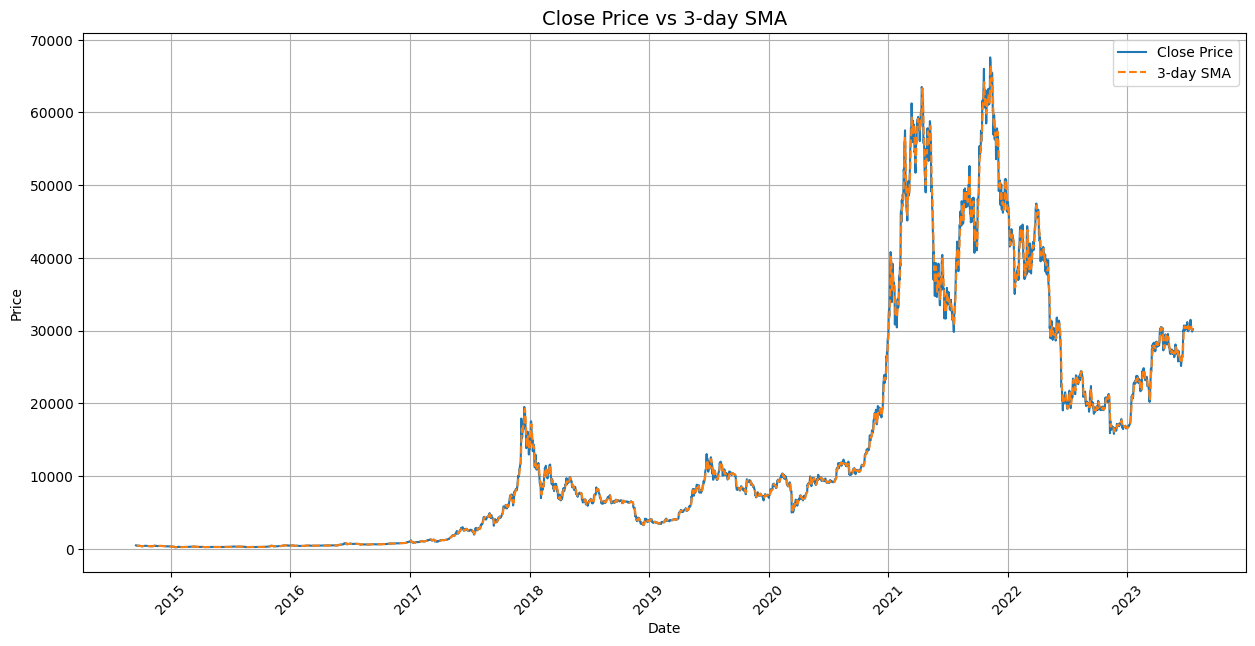

In [31]:
# let's plot this 
fig, ax = plt.subplots(figsize=(15,7))

sns.lineplot(data=data,
             x=data.index,
             y=data['Close'],
             markers='o',
             label = "Close Price",
             ax=ax)

sns.lineplot(data=data,
             x=data.index,
             y=data['3_day SMA'],
             markers='s',
             linestyle = '--',
             label = '3-day SMA',
             ax=ax)

# Customize plot
ax.set_title("Close Price vs 3-day SMA", fontsize=14)
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.legend()
ax.grid(True)
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [35]:
data.loc['2023']

,Open,High,Low,Close,Adj Close,Volume,3_day SMA
Date,,,,,,,
2023-01-01,16547.914063,16630.439453,16521.234375,16625.080078,16625.080078,9244361700,16591.720703
2023-01-02,16625.509766,16759.343750,16572.228516,16688.470703,16688.470703,12097775227,16620.348958
2023-01-03,16688.847656,16760.447266,16622.371094,16679.857422,16679.857422,13903079207,16664.469401
2023-01-04,16680.205078,16964.585938,16667.763672,16863.238281,16863.238281,18421743322,16743.855469
2023-01-05,16863.472656,16884.021484,16790.283203,16836.736328,16836.736328,13692758566,16793.277344
...,...,...,...,...,...,...,...
2023-07-15,30331.783203,30407.781250,30263.462891,30295.806641,30295.806641,8011667756,30701.974609
2023-07-16,30297.472656,30437.560547,30089.669922,30249.132813,30249.132813,8516564470,30293.002604
2023-07-17,30249.626953,30336.400391,29685.783203,30145.888672,30145.888672,13240156074,30230.276042


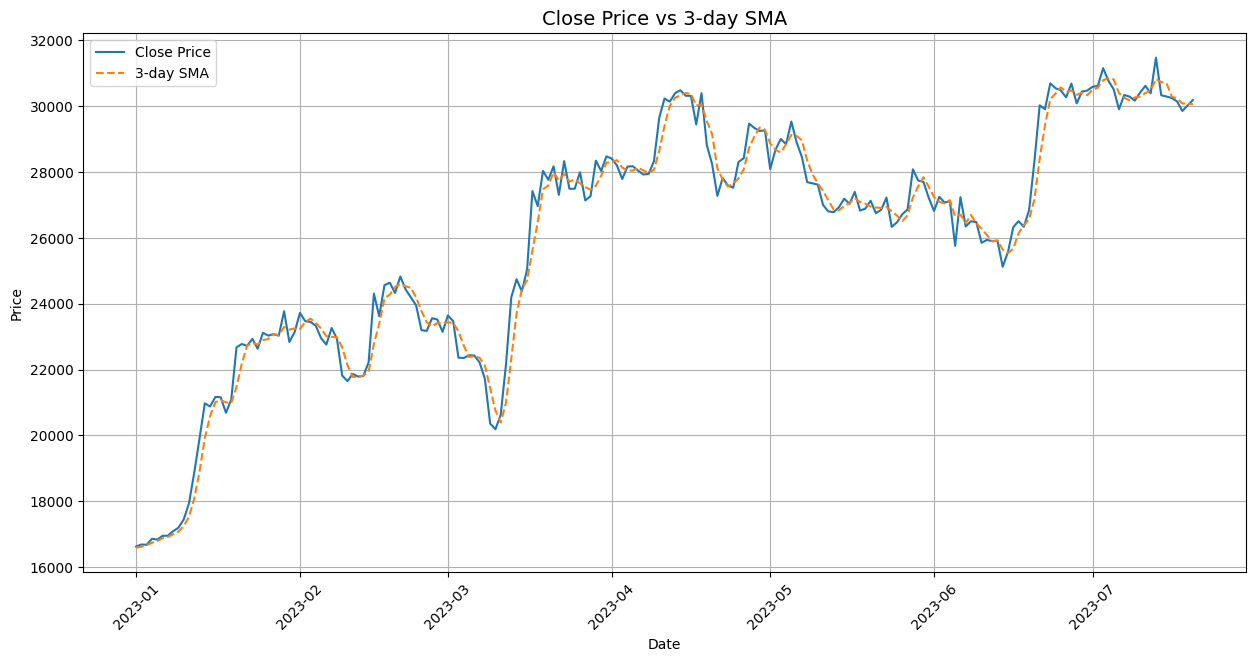

In [ ]:
# let's plot this for the year 2023
fig, ax = plt.subplots(figsize=(15,7))
data_2023 = data.loc['2023']
sns.lineplot(data=data_2023,
             x=data_2023.index,
             y=data_2023['Close'],
             markers='o',
             label = "Close Price",
             ax=ax)

sns.lineplot(data=data_2023.loc['2023'],
             x=data_2023.index,
             y=data_2023['3_day SMA'],
             markers='s',
             linestyle = '--',
             label = '3-day SMA',
             ax=ax)

# Customize plot
ax.set_title("Close Price vs 3-day SMA", fontsize=14)
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.legend()
ax.grid(True)
plt.xticks(rotation=45)

# Show the plot
plt.show()

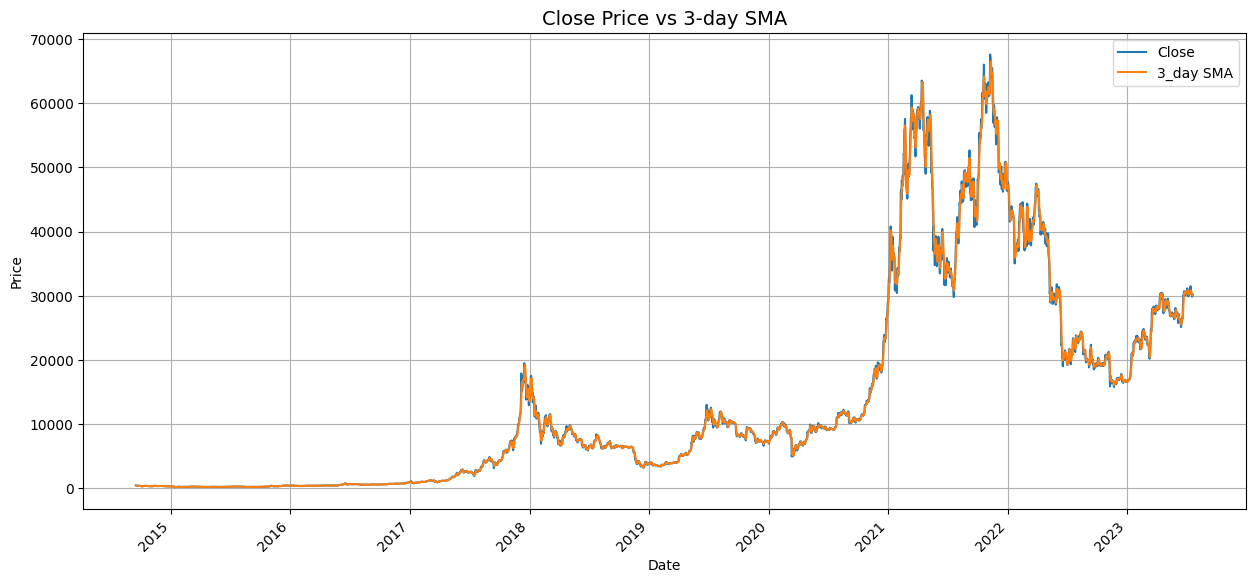

In [ ]:
# simpler way - fast way to plot 
data[['Close', '3_day SMA']].plot(figsize=(15,7))

# Customize plot
plt.title("Close Price vs 3-day SMA", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.show()

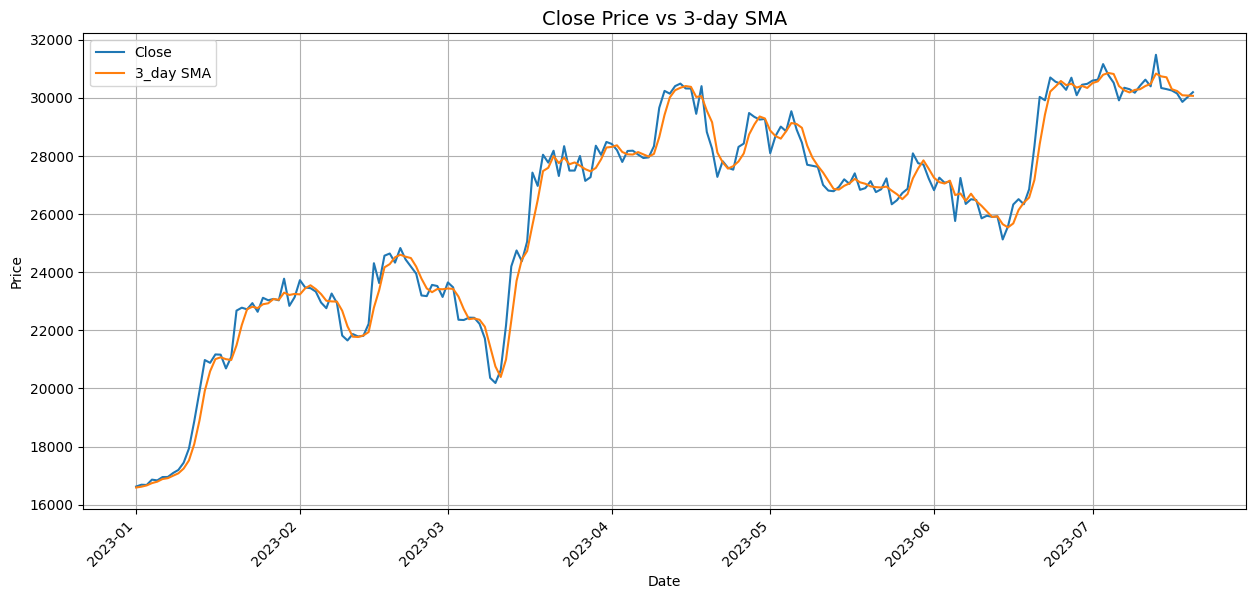

In [37]:
# simpler way - fast way to plot 
data[['Close', '3_day SMA']].loc['2023'].plot(figsize=(15,7))

# Customize plot
plt.title("Close Price vs 3-day SMA", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.show()

In [45]:
# find the max closing price 
data.resample('ME').agg({
    'Close':'max'
})

,Close
Date,
2014-09-30,457.334015
2014-10-31,400.869995
2014-11-30,423.561005
2014-12-31,381.315002
2015-01-31,315.032013
...,...
2023-03-31,28478.484375
2023-04-30,30485.699219
2023-05-31,29534.384766


In [46]:
data.resample('ME').agg({
    'Close':'max'
}).idxmax()

Close   2021-11-30
dtype: datetime64[ns]

In [57]:
# calculating the percent change in closing price 
data['Close'].pct_change()*100

Date
2014-09-17         NaN
2014-09-18   -7.192558
2014-09-19   -6.984264
2014-09-20    3.573492
2014-09-21   -2.465855
                ...   
2023-07-15   -0.126134
2023-07-16   -0.154060
2023-07-17   -0.341313
2023-07-18   -0.959753
2023-07-20    1.116471
Name: Close, Length: 3228, dtype: float64

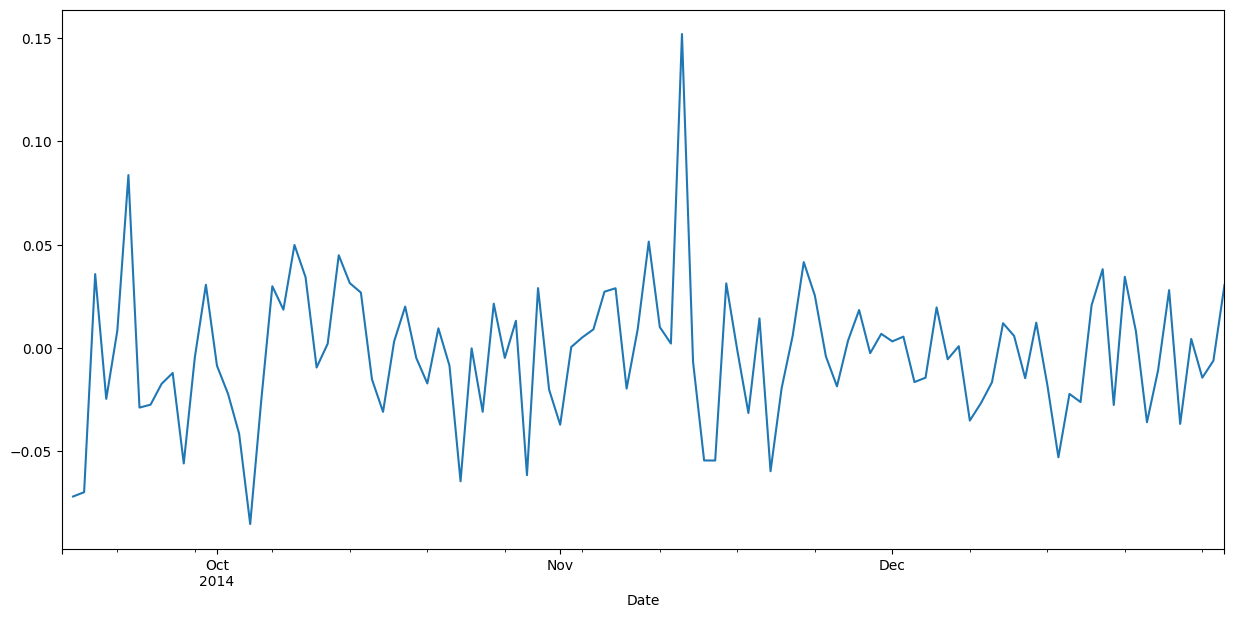

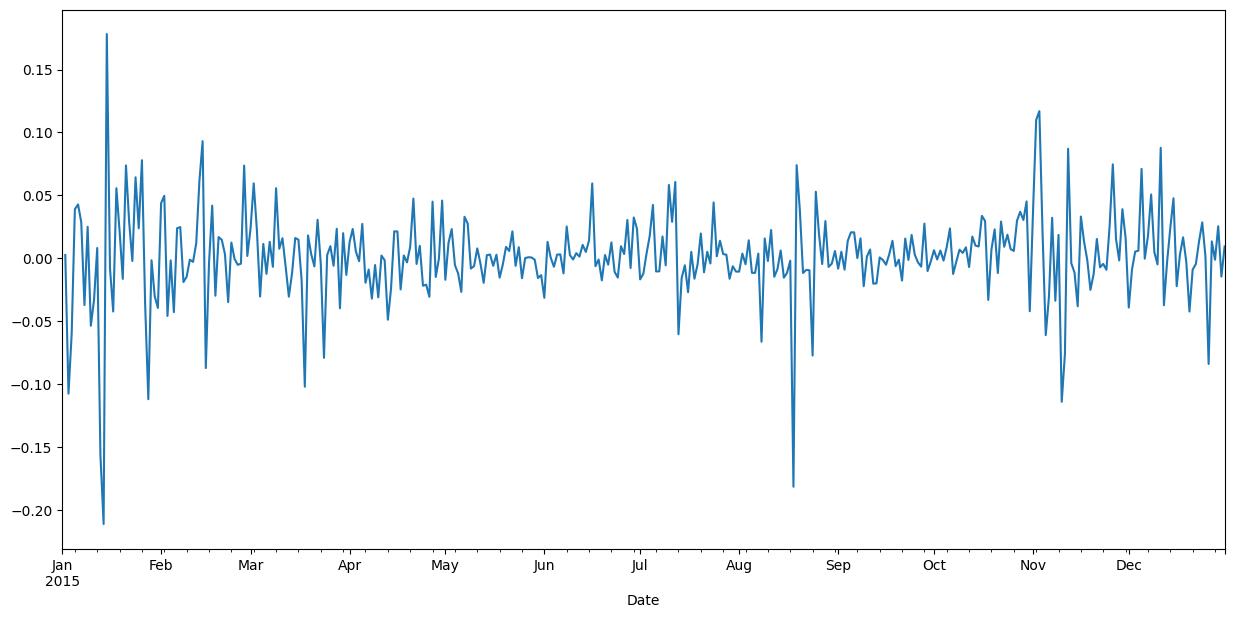

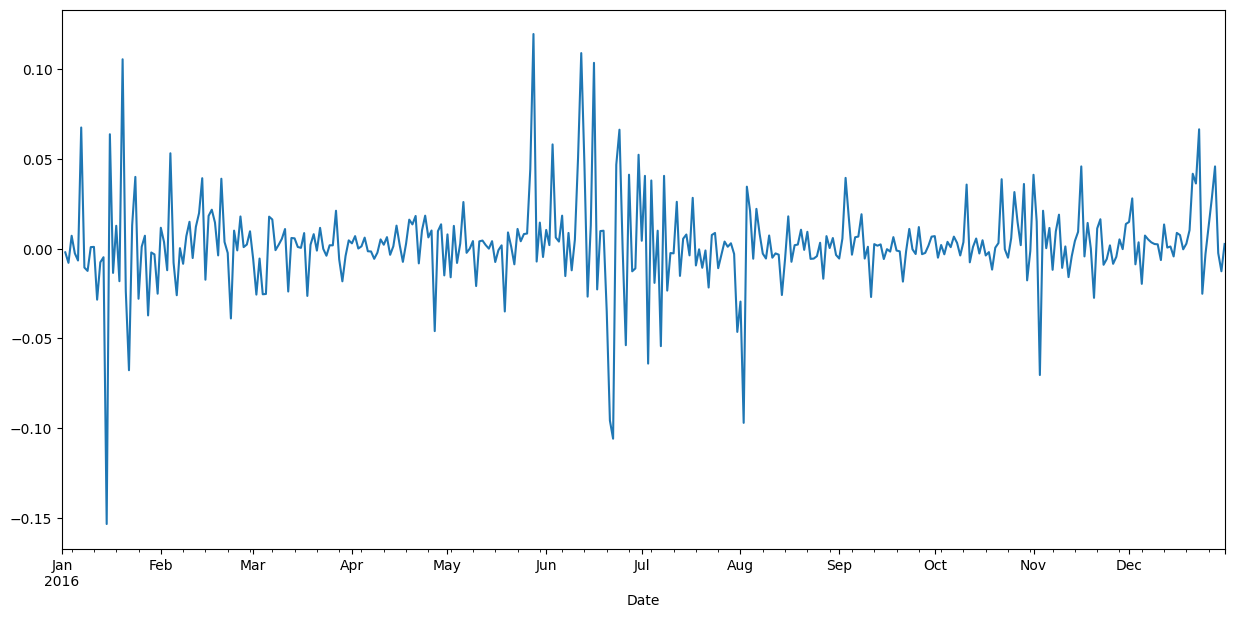

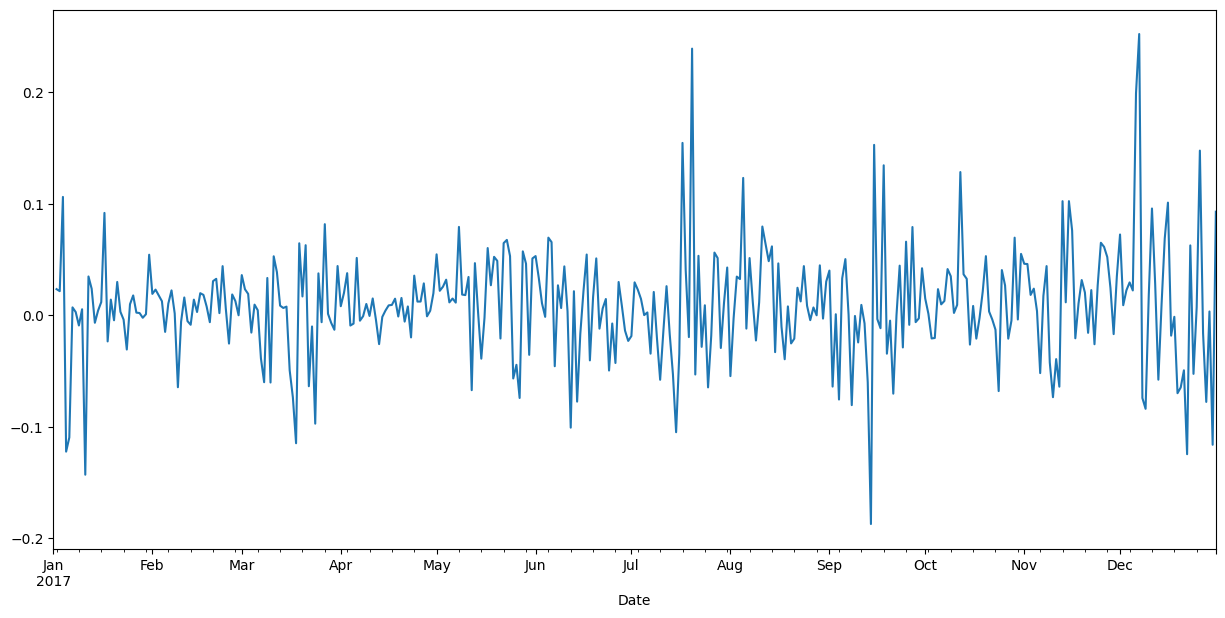

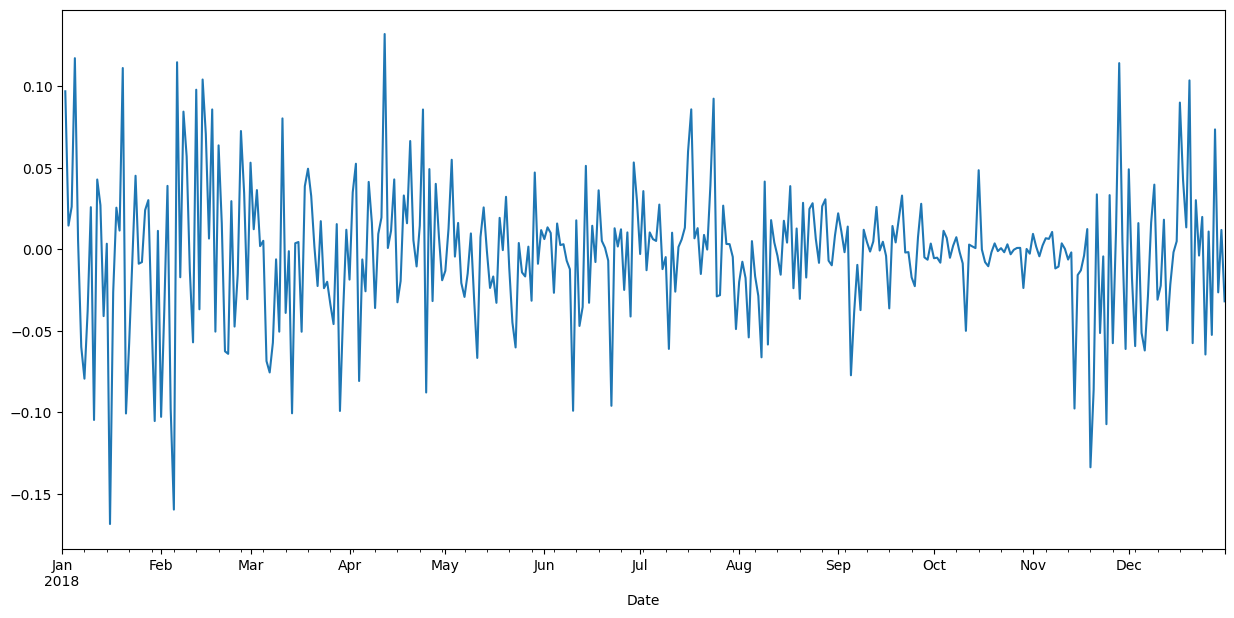

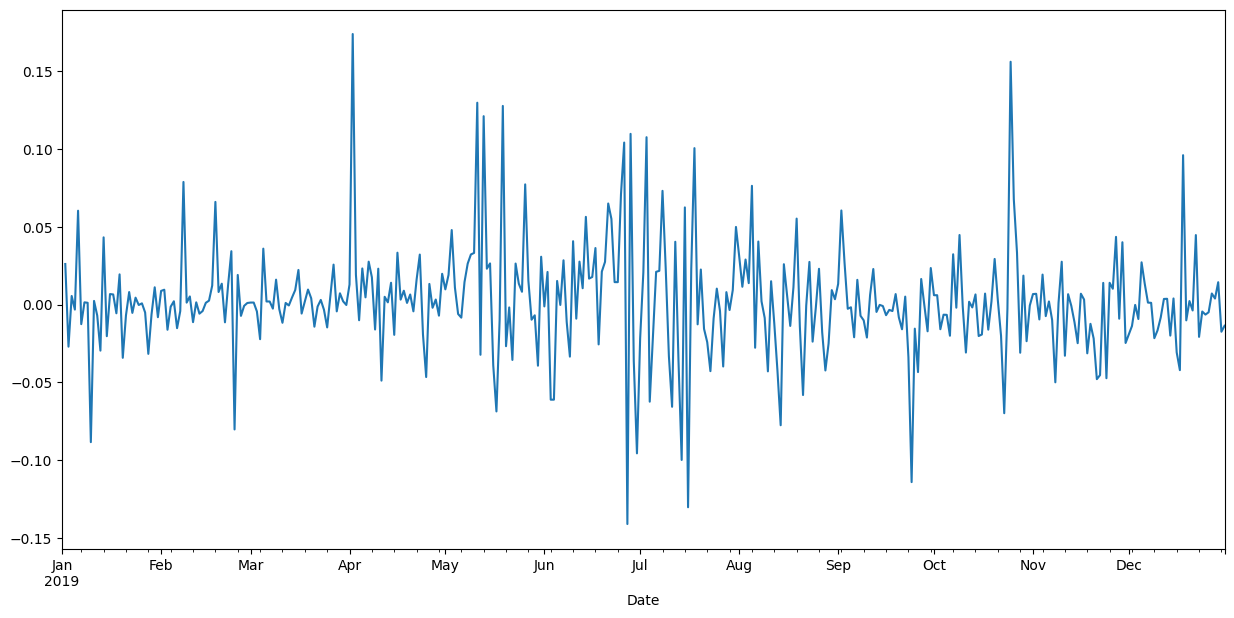

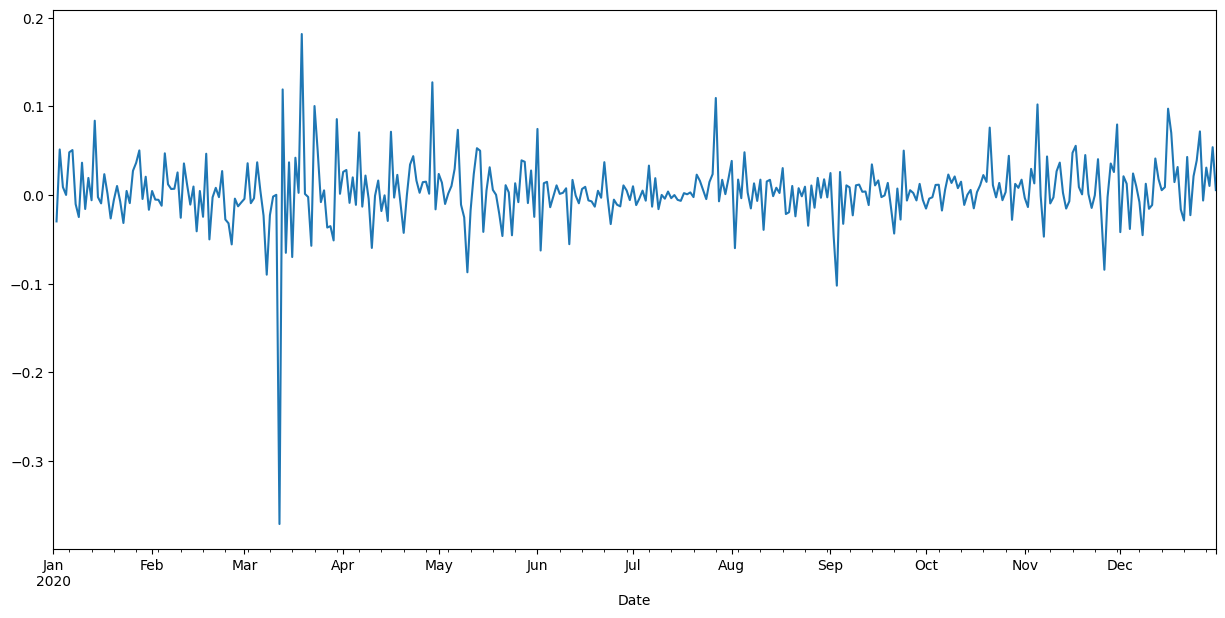

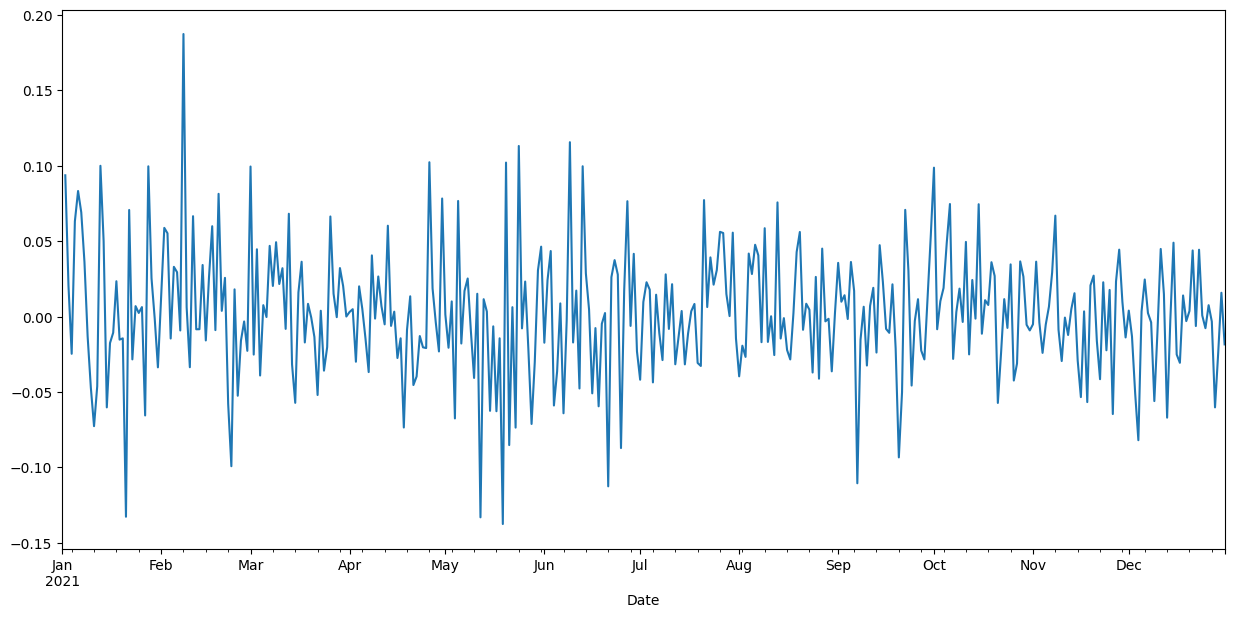

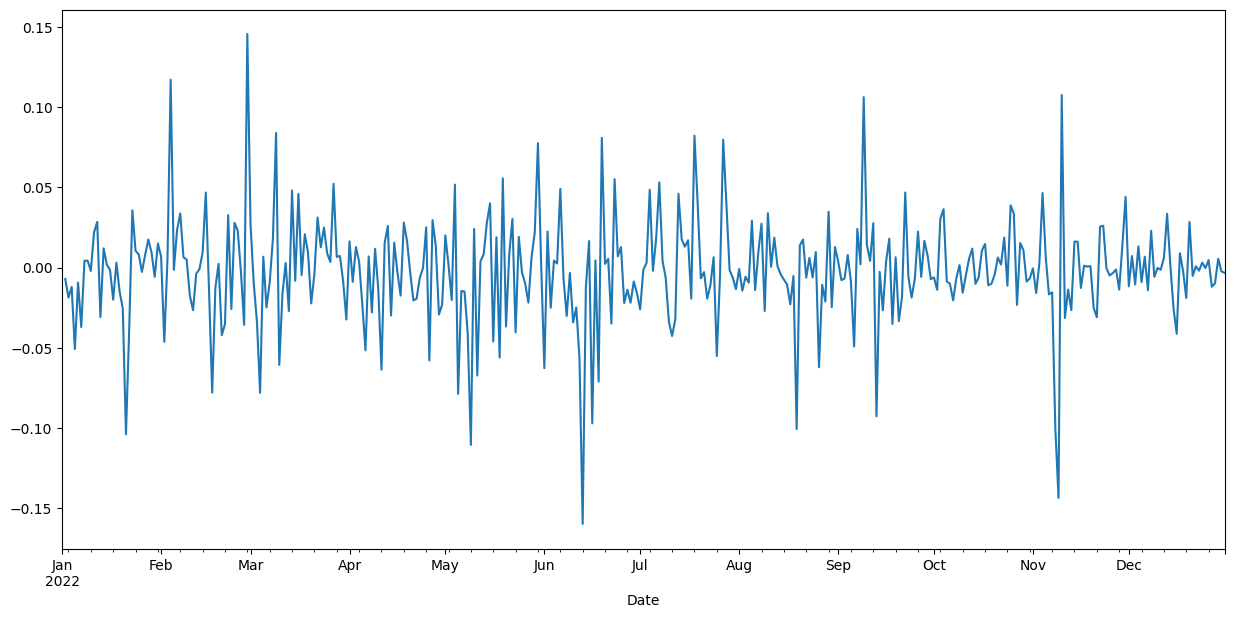

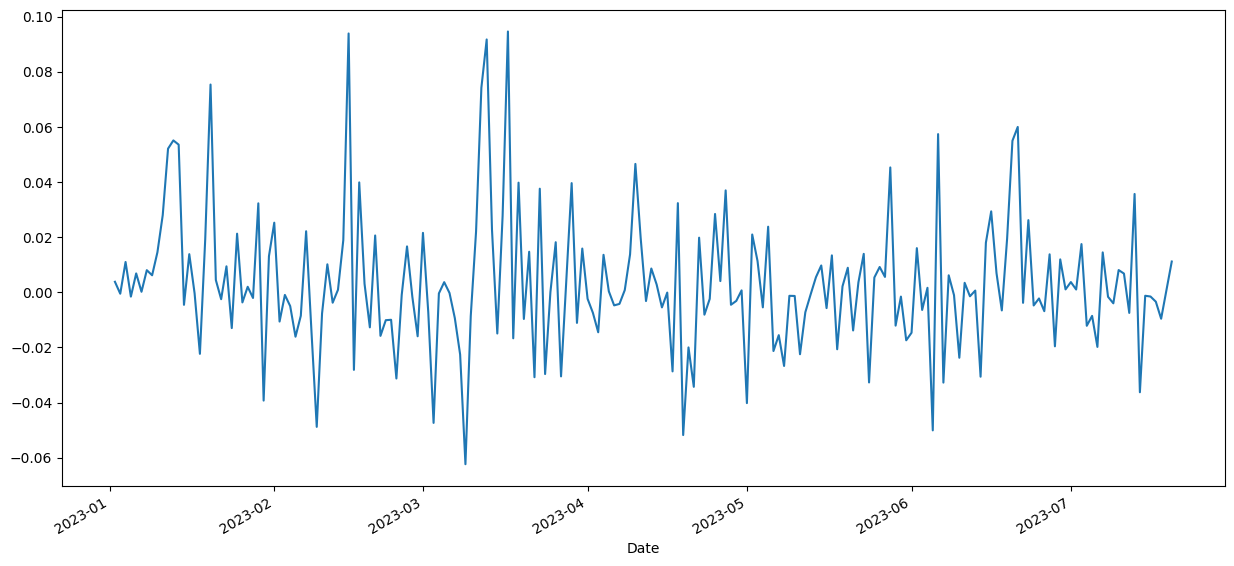

In [59]:
# plot it for each year
years = data.index.year.unique()

for year in years: 
    data['Close'].loc[str(year)].pct_change().plot(figsize=(15,7))
    plt.show()

In [64]:
# check dates which has more than say 15% change in closing prices over the last date 
data['Close'][abs(data['Close'].pct_change())>0.15]

Date
2014-11-12      423.561005
2015-01-13      225.860992
2015-01-14      178.102997
2015-01-15      209.843994
2015-08-18      211.078995
2016-01-15      364.330994
2017-07-17     2228.409912
2017-07-20     2817.600098
2017-09-14     3154.949951
2017-09-15     3637.520020
2017-12-06    14291.500000
2017-12-07    17899.699219
2018-01-16    11490.500000
2018-02-05     6955.270020
2019-04-02     4879.877930
2019-10-25     8660.700195
2020-03-12     4970.788086
2020-03-19     6191.192871
2021-02-08    46196.464844
2022-06-13    22487.388672
Name: Close, dtype: float64

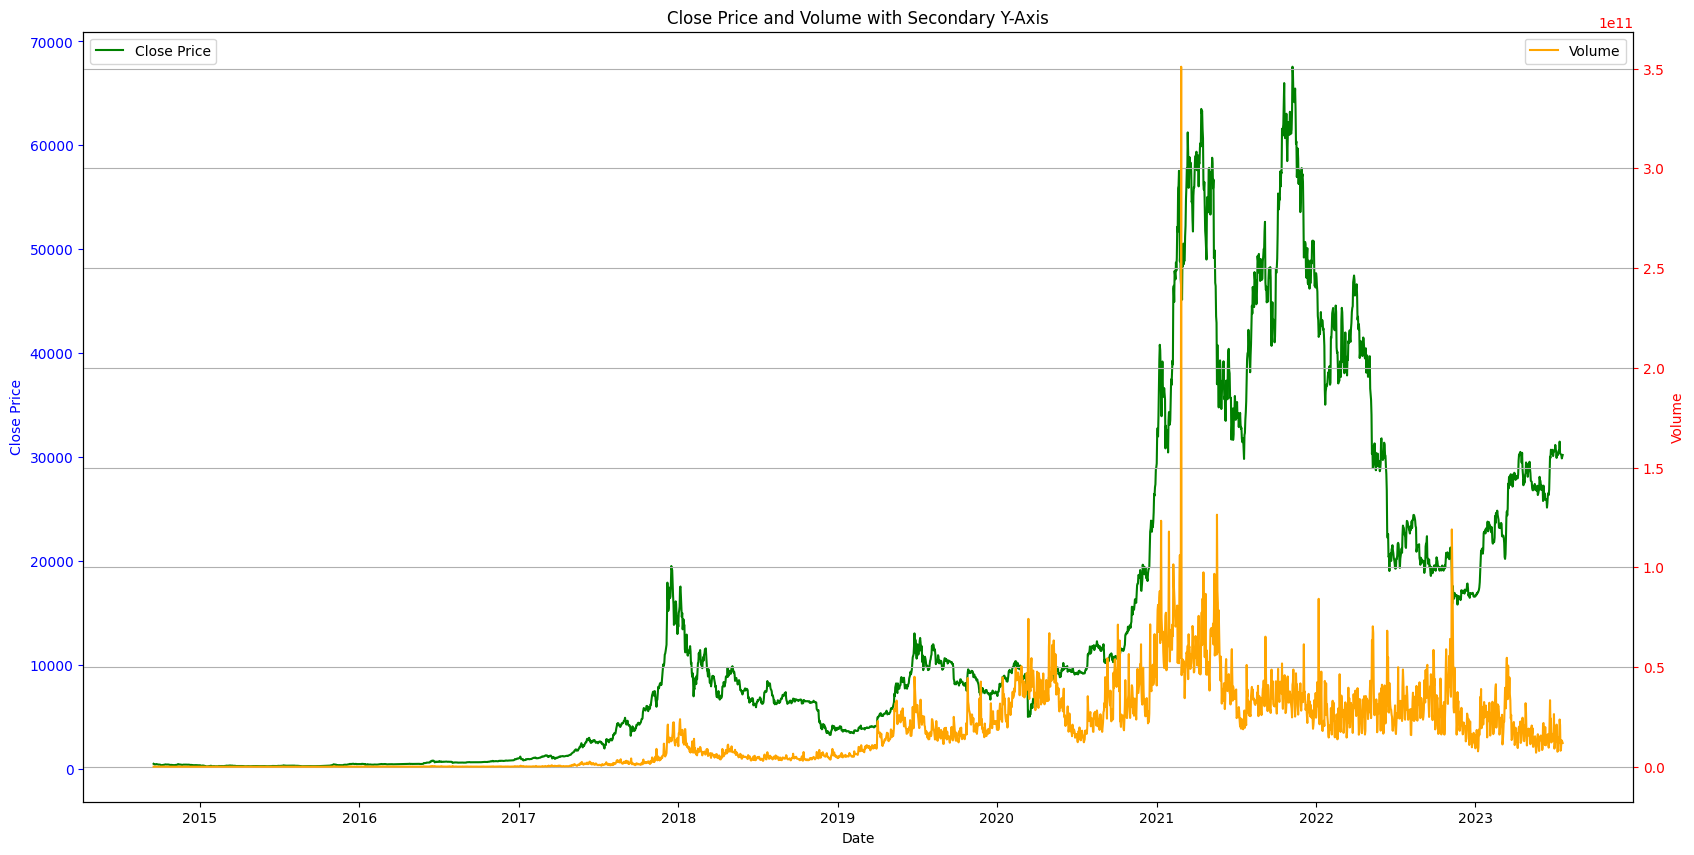

In [85]:
# plot close and volume in a single chart 

fig, ax1 = plt.subplots(figsize=(20,10))

# Plot Close Price on primary y-axis
sns.lineplot(data=data, x=data.index, y="Close", ax=ax1, label="Close Price", color="green")

# Create secondary y-axis
ax2 = ax1.twinx()

# Plot Volume on secondary y-axis
sns.lineplot(data=data, x=data.index, y="Volume", ax=ax2, label="Volume", color="orange")

# Customize primary y-axis (Close Price)
ax1.set_xlabel("Date")
ax1.set_ylabel("Close Price", color="blue")
ax1.tick_params(axis='y', colors="blue")
ax1.set_title("Close Price and Volume with Secondary Y-Axis")

# Customize secondary y-axis (Volume)
ax2.set_ylabel("Volume", color="red")
ax2.tick_params(axis='y', colors="red")

# Add Legends
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.xticks(rotation=45)
plt.grid(True)
plt.show()

plt.show()

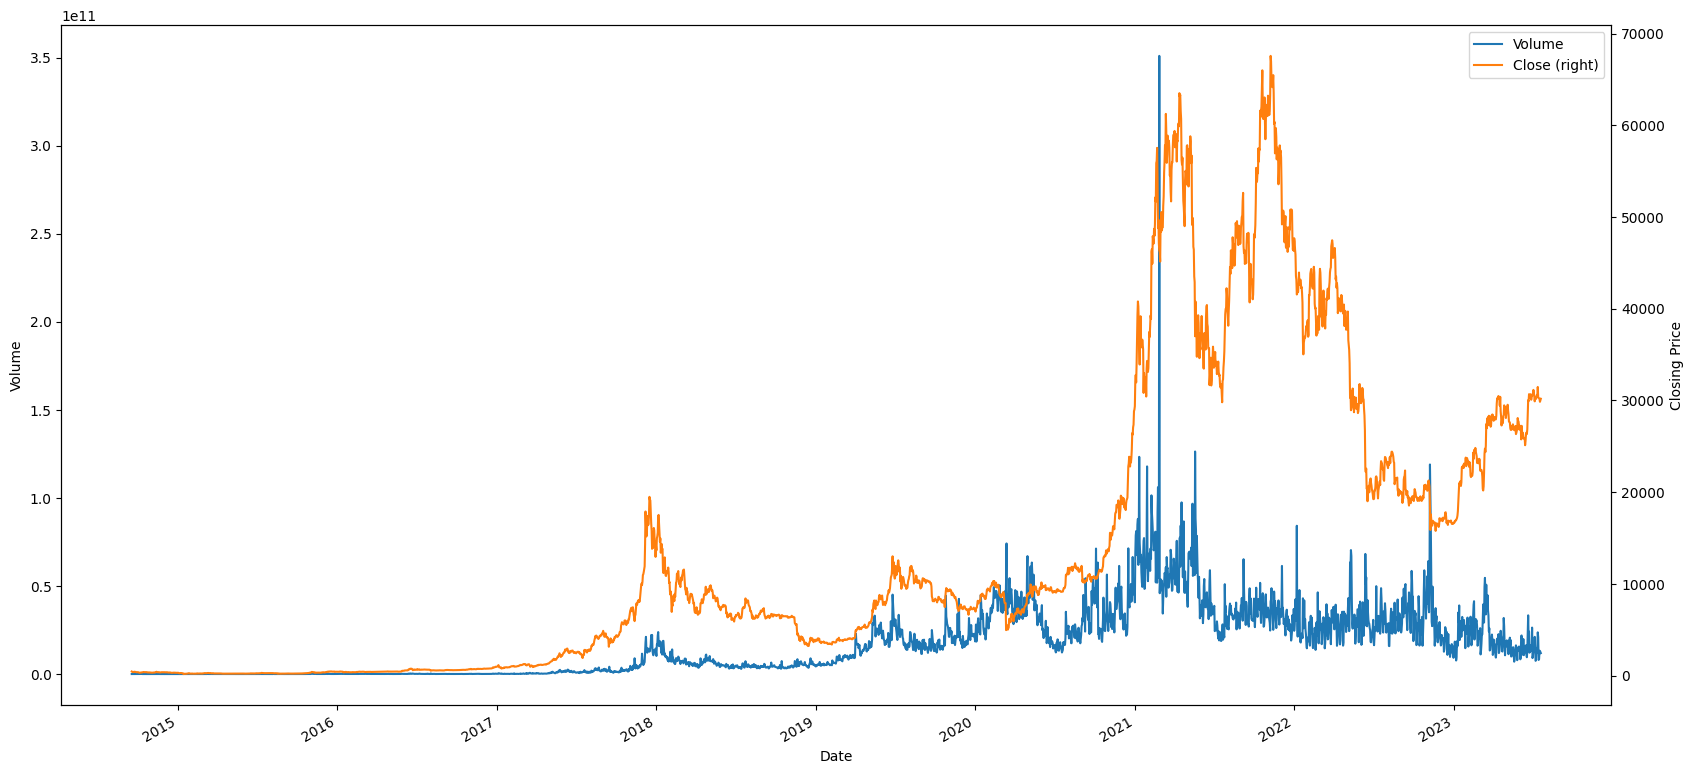

In [ ]:
# easy way to plot the same 

data["Volume"].plot(legend=True, figsize=(20,10), ylabel='Volume')
ax = data["Close"].plot(secondary_y=True, legend=True)
ax.set_ylabel("Closing Price")

plt.show()

Spearman Correlation Matrix:
            Close    Volume
Close   1.000000  0.893982
Volume  0.893982  1.000000


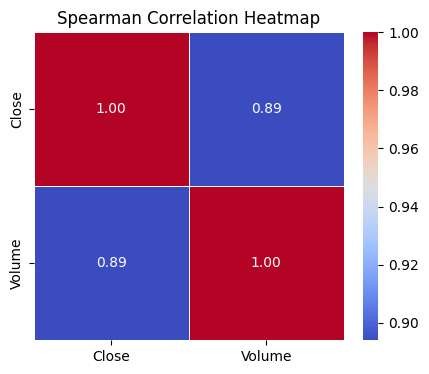

In [88]:
# Compute Spearman correlation
spearman_corr = data[["Close", "Volume"]].corr(method="spearman")

# Display correlation matrix
print("Spearman Correlation Matrix:\n", spearman_corr)

# Plot heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(spearman_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Spearman Correlation Heatmap")
plt.show()

In [ ]:
# lagged variables 
data['Close'].shift(1) # lag is 1 

Date
2014-09-17             NaN
2014-09-18      457.334015
2014-09-19      424.440002
2014-09-20      394.795990
2014-09-21      408.903992
                  ...     
2023-07-15    30334.068359
2023-07-16    30295.806641
2023-07-17    30249.132813
2023-07-18    30145.888672
2023-07-20    29856.562500
Name: Close, Length: 3228, dtype: float64